In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
#Carregando os dados
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head()

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


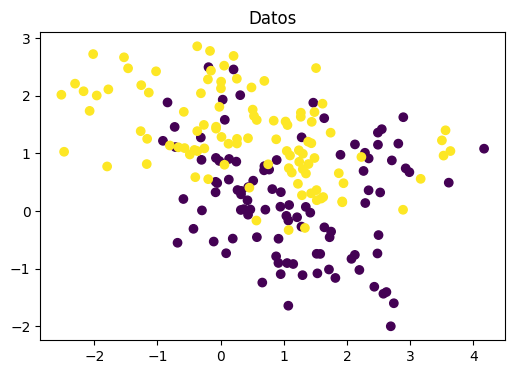

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos");

In [7]:
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [8]:
modelo = RandomForestClassifier(random_state=123).fit(X_train, y_train)

# Predict

In [9]:
predictions = modelo.predict(X_test)

# Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

[[24  4]
 [ 4 28]]


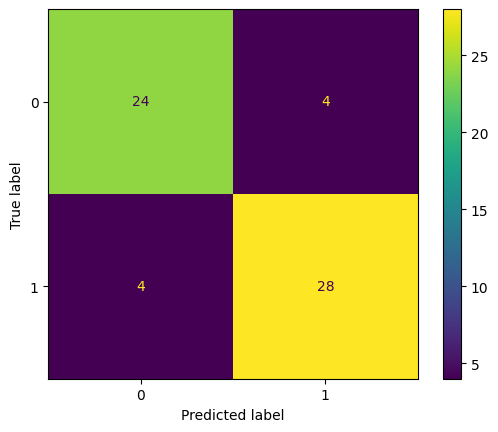

In [16]:
#Matriz de Confusão
con_matrix = confusion_matrix(y_test, predictions)

print(con_matrix)

dist = ConfusionMatrixDisplay(con_matrix)
dist.plot()
plt.show()

# Metricas

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [13]:
acur = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy of the classifier is: {acur}")
print(f"Precisão: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")

Accuracy of the classifier is: 0.8666666666666667
Precisão: 0.875
Recall: 0.875
F1 Score: 0.875


# AUC e GINI 

In [17]:
from sklearn.metrics import roc_curve, auc

AUC for our classifier is: 0.92578125


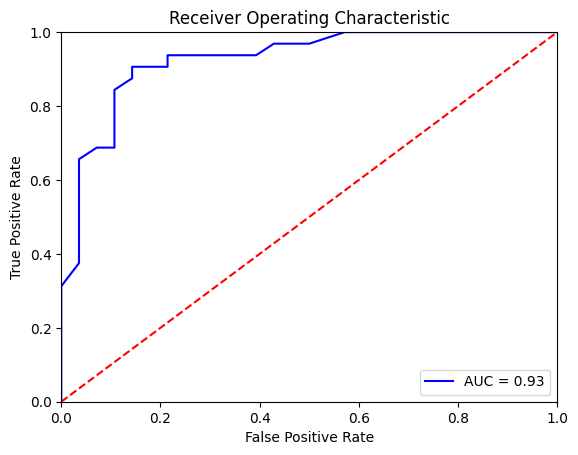

In [20]:
# CURVA - ROC
class_probabilities = modelo.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plot da Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
gini = 2*(roc_auc-0.5)
print("Gini:", gini)

Gini: 0.8515625


# KS

In [35]:
from scipy.stats import ks_2samp
KS = ks_2samp(class_probabilities[:,1], y_test)
print(f"KS: {round(KS[0],2)*100}")

KS: 52.0
